# LSTM - Learning a sin curve


In [1]:
from conx import Network, Layer, LSTMLayer, plot, frange
import math

Using Theano backend.
conx, version 3.5.5


For this experiment, we will use the monthly money spent by international airline passengers on tickets between 1949 and 1961:

In [2]:
scaled_data = [round(math.sin(x),1) for x in frange(0, 2 * math.pi + .1, .1)]

In [3]:
[x for x in enumerate(scaled_data) if -0.1 < x[1] < 0.1]

[(0, 0.0), (31, 0.0), (63, 0.0)]

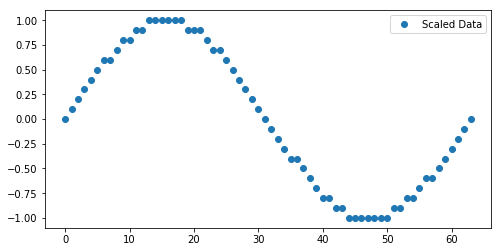

In [4]:
plot(["Scaled Data", scaled_data], default_symbol="o")

In [5]:
scaled_data[0], scaled_data[-1]

(0.0, 0.0)

For our dataset, we will contruct a history sequence. First, we need to put each scaled dollar amount into a list. This is the list of *features*. In our case, we just have the one feature:

In [6]:
sequence = [[datum] for datum in scaled_data]

We wish that the inputs -> targets are constructed as follows:

1. [S0] -> S1
2. [S1] -> S2
3. ...

where Sn is a list of features in the sequence.

We need to inform the network of the shape of the sequence. We need the:

* time_steps - the length of the history
* batch_size - how many vectors are the inputs composed of?
* features - the length of each input bank vector

In [7]:
time_steps = 10  # history
batch_size = 1  # how many to load at once
features = 1    # features (length of input vector)

In [8]:
def create_dataset(sequence, time_steps):
    dataset = []
    for i in range(len(sequence)-time_steps-1):
        dataset.append([sequence[i:(i+time_steps)], 
                       sequence[i + time_steps]])
    return dataset

In [9]:
dataset = create_dataset(sequence, time_steps)

In [10]:
print(dataset[0])
print(dataset[1])

[[[0.0], [0.1], [0.2], [0.3], [0.4], [0.5], [0.6], [0.6], [0.7], [0.8]], [0.8]]
[[[0.1], [0.2], [0.3], [0.4], [0.5], [0.6], [0.6], [0.7], [0.8], [0.8]], [0.9]]


Now we construct the network giving the batch_shape in terms of (look_back, banks, width):

In [11]:
net = Network("LSTM - sin")
net.add(Layer("input", features, batch_shape=(batch_size, time_steps, features)))
net.add(LSTMLayer("lstm", 4)) 
net.add(Layer("output", 1))
net.connect()
net.compile(error="mse", optimizer="adam")

In [12]:
net.dataset.clear()
net.dataset.load(dataset)

In [13]:
net.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), FloatSlider(value=1.0, continuous_update=False, description='Zoom', max=3.0, min=0.5), IntText(value=150, description='Horizontal space between banks:', style=DescriptionStyle(description_width='initial')), IntText(value=30, description='Vertical space between layers:', style=DescriptionStyle(description_width='initial')), HBox(children=(Checkbox(value=False, description='Show Targets', style=DescriptionStyle(description_width='initial')), Checkbox(value=False, description='Errors', style=DescriptionStyle(description_width='initial')))), Select(description='Features:', options=('',), rows=1, value=''), IntText(value=3, description='Feature columns:', style=DescriptionStyle(description_width='initial')), FloatText(value=2.0, description='Feature scale:', style=DescriptionStyle(description_width='initial'))), layout=Layout(width='100%')), VBox(children=(Select(description='Layer:', index=2, options=('input', 'lstm', 'output'), rows=1, value='output'), Checkbox(value=True, description='Visible'), Select(description='Colormap:', options=('', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Vega10', 'Vega10_r', 'Vega20', 'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spectral', 'spectral_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'viridis', 'viridis_r', 'winter', 'winter_r'), rows=1, value=''), HTML(value='<img src="data:image/gif;base64,R0lGODdhLAEZAIcAAPEBAY8AAM8AAAEB8q8AAAAAbwAAsAAAkAAA0PTo8vr3+wAAV0dH/7e3//9WVv/W1hYW/zQ0/2dn/4aG/6Sk/9nZ//8XF/82Nv9oaP+Xl/+1tSQk/1lZ/3h4/5SU/8nJ//8mJv9ERP95ef+Hh/+mpv/ExH8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

<IPython.core.display.Javascript object>

In [14]:
net["lstm"].get_output_shape()

(1, 4)

In [15]:
#net.dataset.split(.33)

In [16]:
net.propagate([[.02]] * time_steps)

[0.009405624121427536]

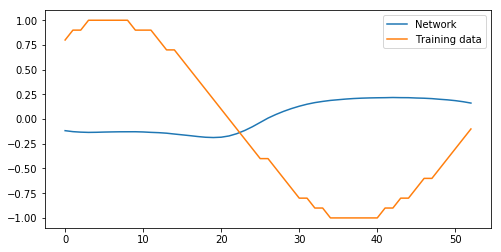

In [17]:
net.reset()
outputs = [net.propagate(i) for i in net.dataset.inputs]
plot([["Network", outputs], ["Training data", net.dataset.targets]])

In [18]:
#net.reset(); 
net.delete()

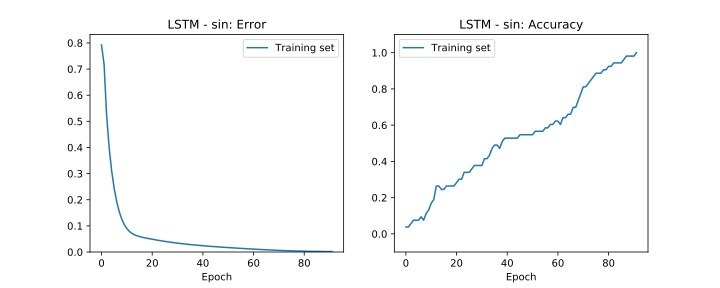

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
#   91 |   0.00156 |   1.00000 
Saving network... Saved!


In [19]:
if net.saved():
    net.load()
    net.plot_results()
else:
    net.train(500, batch_size=batch_size, accuracy=1.0, tolerance=0.1, 
              shuffle=False, plot=True, save=True)

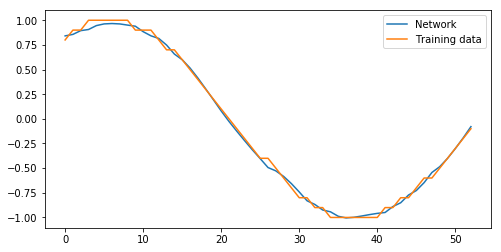

In [20]:
outputs = [net.propagate(i)  for i in net.dataset.inputs]
plot([["Network", outputs], ["Training data", net.dataset.targets]])

In [21]:
net.propagate(net.dataset.inputs[0]), net.dataset.targets[0]

([0.8412674069404602], [0.800000011920929])